In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
training_labels = pd.read_csv("labels_training_set.csv", low_memory=False)
labels_predict = pd.read_csv("trocafone_kaggle_test.csv", low_memory=False)
features = pd.read_csv('data_set.csv', low_memory = False)

In [3]:
print(training_labels.shape)
training_labels = pd.merge(features, training_labels, on='person', how='inner')
print(training_labels.shape)
training_labels.head(2)

(19414, 2)
(19414, 218)


,person,Direct,Email,Organic,Paid,Referral,Social,ad campaign hit,brand listing,checkout,...,minimo,suma_resolution,promedio_resolution,maximo_resolution,minimo_resolution,promedio de TFIdf modelo,Suma de TFidf modelo,Maximo de TFIdf modelo,Minimo de TFIdf modelo,label
0,0008ed71,2.0,0.0,0.0,0.0,0.0,0.0,0,0,3,...,20180517122747,4147200,691200.000000,2073600,0,1.617163,4.851488,1.859879,1.300103,0
1,000c79fe,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,...,20180529002747,230400,13552.941176,230400,0,1.000000,4.000000,1.000000,1.000000,0


In [4]:
labels = training_labels['label']
features = training_labels.drop(['label','person'], axis=1)

In [5]:
from xgboost import XGBClassifier
cv = StratifiedKFold(2)
rfe = RFECV(XGBClassifier(), cv=cv, scoring='accuracy')

rfe = rfe.fit(features, labels)

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True  True  True  True False False
  True False False False False  True  True False False False  True False
 False False False False  True False False False False False False False
 False False False False  True False False False  True False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False False False  True False  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True False False  True False  True
 False False  True False False  True  True  True False False False False
  True  True  True False  True  True  True False Fa

In [9]:
mask = rfe.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, features):
    if bool:
        new_features.append(feature)

In [10]:
new_features

['ad campaign hit',
 'brand listing',
 'checkout',
 'conversion',
 'search engine hit',
 'time_score',
 'promedio dias',
 'storage_16GB',
 'storage_8GB',
 'marca_Samsung',
 'marca_iPhone',
 'color_Branco Framboesa',
 'color_Dourado',
 'color_Preto',
 'color_Preto Brilhante',
 'color_Preto Matte',
 'color_Rosa',
 'coincide',
 'sessions',
 'total_time',
 'mean_time_by_session',
 'max_session_time',
 'mean_events_by_session',
 'max_events_by_session',
 'days_since_last_session',
 'Suma de TFidf busquedas',
 'Minimo de TFIdf busquedas',
 'same_product_max_views',
 'viewed/checkout gral',
 'Computer',
 'Smartphone',
 'city',
 'city_ranking',
 'most_frequent_model',
 'skusum',
 'daysum',
 'horasum',
 'weekday_Sundaysum',
 'weekday_Wednesdaysum',
 'periodo_nochesum',
 'mes_Febsum',
 'mes_Maysum',
 'skumean',
 'weekday_Mondaymean',
 'weekday_Thursdaymean',
 'periodo_madrugadamean',
 'mes_Maymean',
 'suma',
 'promedio',
 'maximo',
 'minimo',
 'suma_resolution',
 'promedio_resolution',
 'maximo_

Optimal number of features : 56


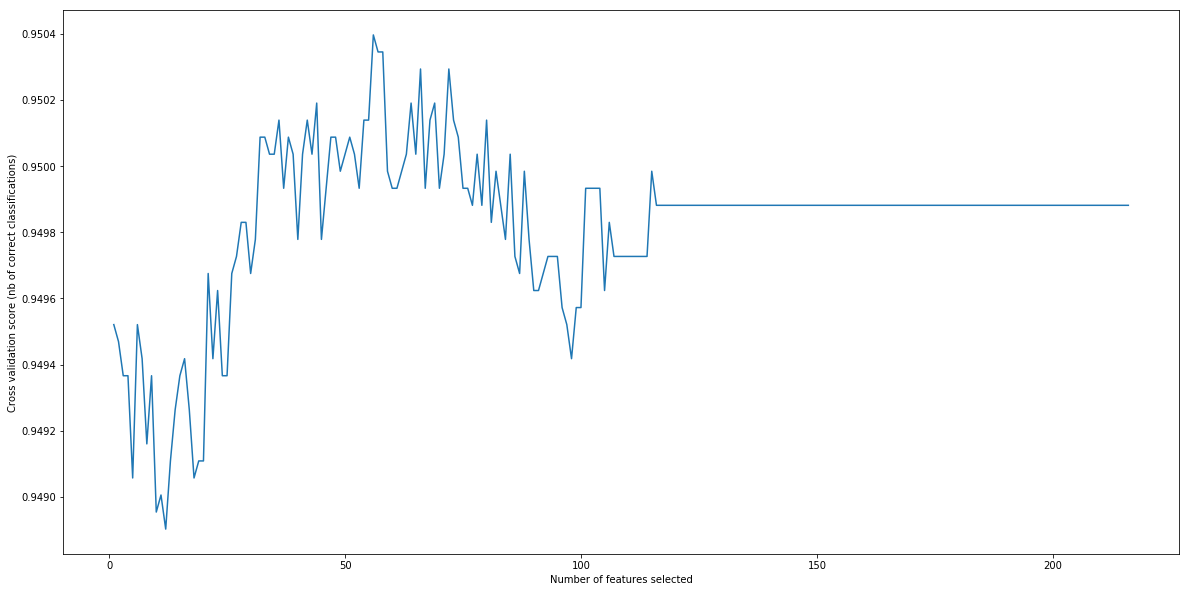

In [13]:
print("Optimal number of features : %d" % rfe.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(20,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")

plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()